In [12]:
import os
import sys 
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import plotly
import plotly.graph_objects as go
import plotly.express as px
import kaleido ##pip install -U kaleido ##to save a plotly fig
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict

In [2]:
df1 = pd.read_csv('Stable_Data_CSV.csv')
df2 = pd.read_csv('all_features.csv')
df_stable = df2[df2.set_index(['participant_id']).index.isin(df1.set_index(['participant_id']).index)]

# dataset with all features [34 features * 3 timesteps + 1 response variable]
df_stable=df_stable.drop(['participant_id','arm'],axis=1)

#dataset with selected fetures [[8 features * 3 timesteps + 1 response variable]]
df_stable_FS=(df_stable[['c_3','sl_1','sl_2','a_2','r_1','q_1','e_1','tfi_total','c_3.1','sl_1.1','sl_2.1','a_2.1','r_1.1','q_1.1','e_1.1','tfi_total.1','c_3.2','sl_1.2','sl_2.2','a_2.2','r_1.2','q_1.2','e_1.2','tfi_total.2','tfi_total.3']])

In [27]:
## Apply Pearson Corelation and Drop the corelated colums from the dataset

print("The dataset has", len(df_stable.columns),"colums")
## function to find the Pearson corerelation
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

## Apply pearson corelation
# load dataset
#dataset = read_csv('revised_data.csv', header=0, index_col=0)
#values = dataset.values.astype('float32')

corr_features = correlation(df_stable , 0.7)

## Drop the corelated colums from the dataset
corr_dropped_data=df_stable.drop(corr_features,axis=1)
print("The dataset now has", len(corr_dropped_data.columns),"colums")
#corr_dropped_data.to_csv('corr_dropped_data.csv')

#corr_dropped_data

The dataset has 103 colums
The dataset now has 32 colums


In [23]:
print(corr_dropped_data.columns)

Index(['i_1', 'i_2', 'i_3', 'sc_1', 'sc_2', 'sc_3', 'c_1', 'sl_1', 'a_1',
       'r_1', 'q_1', 'q_2', 'q_3', 'q_4', 'e_1', 'e_3', 'i_1.1', 'i_2.1',
       'i_3.1', 'sc_1.1', 'sc_2.1', 'sc_3.1', 'r_1.1', 'q_1.1', 'q_4.1',
       'e_1.1', 'i_1.2', 'i_2.2', 'sc_1.2', 'sl_1.2', 'a_1.2', 'q_1.2'],
      dtype='object')


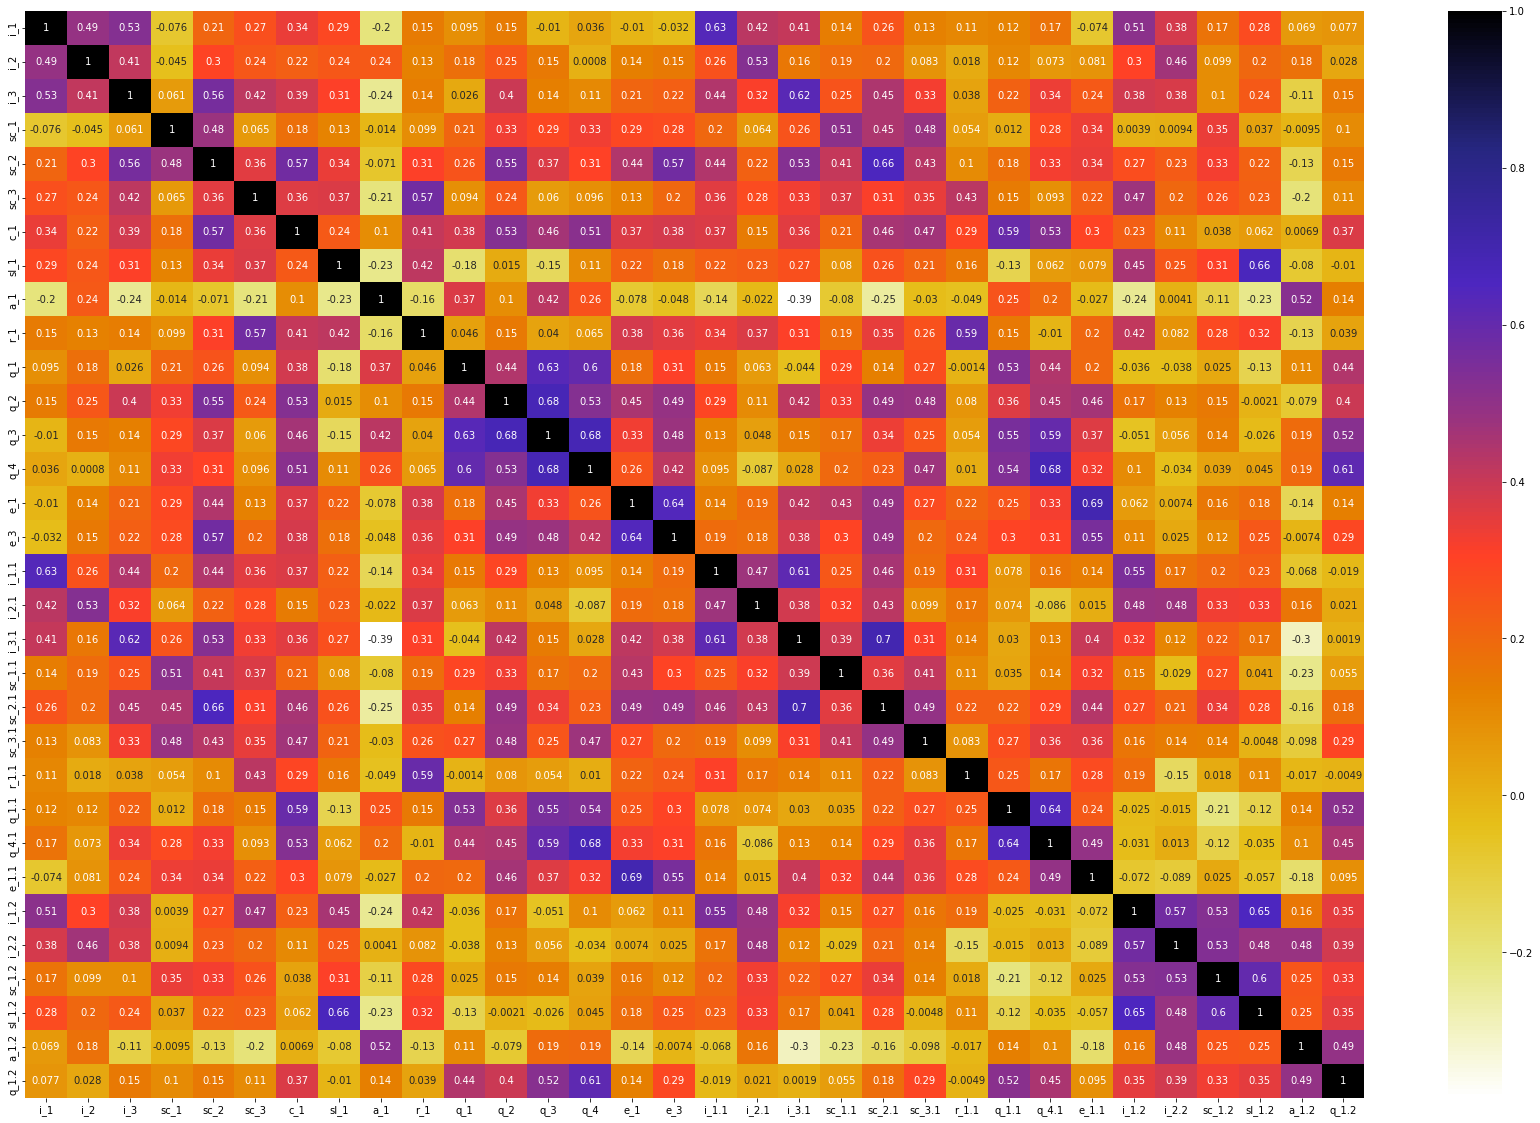

In [25]:
#Using Pearson Correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,20))
cor = corr_dropped_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()